##Implementasi Hybrid pada CNN untuk Speech Emotion Recognition Menggunakan Dataset RAVDESS

Nama : Yusma Zainal Lathiif

Nim : 22.11.4755

In [ ]:
!pip install librosa
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import IPython.display as ipd
from IPython.display import Audio

##**IMPORT DATASET DARI KAGGLE**

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 94% 404M/429M [00:00<00:00, 478MB/s]
100% 429M/429M [00:00<00:00, 537MB/s]


In [ ]:
!unzip ravdess-emotional-speech-audio.zip -d voice_dataset

Archive:  ravdess-emotional-speech-audio.zip
  inflating: voice_dataset/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: voice_dataset/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: voice_dataset/Actor_01/03-01-03-01-02-01-01.wav  
  inflatin

##**Menampilkan Data**

Total file audio: 60
Contoh file: ['03-01-02-02-01-01-01.wav', '03-01-02-02-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-01-01-02-02-01.wav', '03-01-06-02-02-02-01.wav']

[INFO AUDIO]
File: 03-01-02-02-01-01-01.wav
Durasi: 3.70 detik
Sample rate: 48000


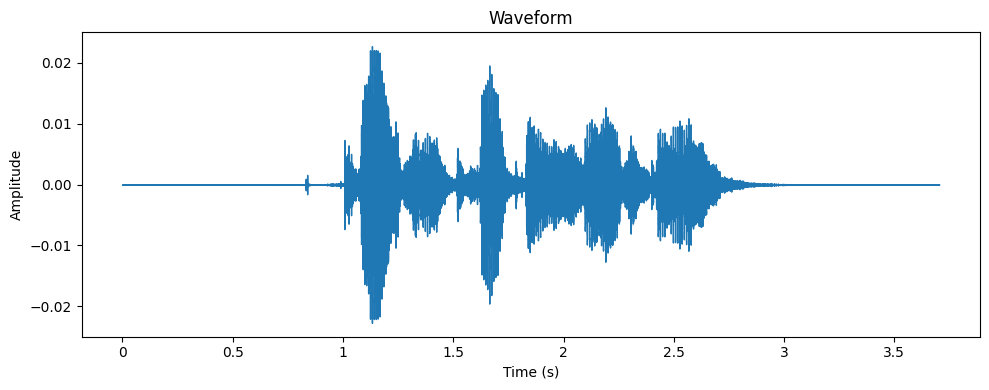

In [ ]:
# Menentukan path ke folder dataset
data_path = "/content/voice_dataset/Actor_01"

# Melihat semua file audio dalam folder
audio_files = [f for f in os.listdir(data_path) if f.endswith('.wav') or f.endswith('.mp3')]

# Tampilkan jumlah dan beberapa nama file
print(f"Total file audio: {len(audio_files)}")
print("Contoh file:", audio_files[:5])

# Pilih salah satu file untuk ditampilkan
file_to_preview = os.path.join(data_path, audio_files[0])  # ambil file pertama

# Muat file audio
y, sr = librosa.load(file_to_preview, sr=None)

# Tampilkan info dasar
print(f"\n[INFO AUDIO]")
print(f"File: {audio_files[0]}")
print(f"Durasi: {librosa.get_duration(y=y, sr=sr):.2f} detik")
print(f"Sample rate: {sr}")

# Visualisasi waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Putar audio-nya
Audio(y, rate=sr)


#Preprosesing

In [ ]:
ravdess = "/content/voice_dataset/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_05', 'Actor_21', 'Actor_14', 'Actor_19', 'Actor_18', 'Actor_24', 'Actor_11', 'Actor_10', 'Actor_02', 'Actor_22', 'Actor_06', 'Actor_13', 'Actor_12', 'Actor_01', 'Actor_23', 'Actor_09', 'Actor_15', 'Actor_04', 'Actor_16', 'Actor_08', 'Actor_03', 'Actor_17', 'Actor_20', 'Actor_07']


In [ ]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # Add '/' to correctly join paths
    actor = os.listdir(os.path.join(ravdess, i))
    for f in actor:
        part = f.split('.')[0].split('-')
        file_emotion.append(int(part[2]))
        # Add '/' to correctly join paths
        file_path.append(os.path.join(ravdess, i, f))

In [ ]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-07-02-02-01-07.wav
03
/content/voice_dataset/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-01-05.wav
7
03-01-07-01-02-02-07.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df['Emotions'] = ravdess_df['Emotions'].replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'})

print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

   Emotions                                               Path
0     angry  /content/voice_dataset/audio_speech_actors_01-...
1  surprise  /content/voice_dataset/audio_speech_actors_01-...
2   neutral  /content/voice_dataset/audio_speech_actors_01-...
3  surprise  /content/voice_dataset/audio_speech_actors_01-...
4      fear  /content/voice_dataset/audio_speech_actors_01-...
______________________________________________
     Emotions                                               Path
1435     fear  /content/voice_dataset/audio_speech_actors_01-...
1436      sad  /content/voice_dataset/audio_speech_actors_01-...
1437    happy  /content/voice_dataset/audio_speech_actors_01-...
1438     fear  /content/voice_dataset/audio_speech_actors_01-...
1439  disgust  /content/voice_dataset/audio_speech_actors_01-...
_______________________________________________
Emotions
angry       192
surprise    192
fear        192
sad         192
happy       192
disgust     192
calm        192
neutral      96


In [ ]:
data_path = pd.concat([ravdess_df], axis = 0)

# Check the class distribution
print(data_path.Emotions.value_counts())

# Separate classes
neutral = data_path[data_path.Emotions == 'neutral']
calm = data_path[data_path.Emotions == 'calm']
happy = data_path[data_path.Emotions == 'happy']
sad = data_path[data_path.Emotions == 'sad']
angry = data_path[data_path.Emotions == 'angry']
fear = data_path[data_path.Emotions == 'fear']
disgust = data_path[data_path.Emotions == 'disgust']
surprise = data_path[data_path.Emotions == 'surprise']


# Tentukan target jumlah data per kelas (berdasarkan kelas mayoritas)
target_count = max([
    len(calm), len(happy), len(sad), len(angry),
    len(fear), len(disgust), len(surprise)
])

# Hitung berapa yang perlu ditambahkan ke kelas minoritas (neutral)
need_neutral = target_count - len(neutral)

# Oversampling kelas 'neutral' dengan duplikasi acak
neutral_oversampled = neutral.sample(n=need_neutral, replace=True, random_state=42)

# Gabungkan semua data menjadi balanced
balanced_data = pd.concat([
    calm, happy, sad, angry, fear, disgust, surprise, neutral, neutral_oversampled
], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

# Check the class distribution of the balanced dataset
print(balanced_data.Emotions.value_counts())

balanced_data.to_csv("data_path.csv",index=False)
balanced_data.head()

Emotions
angry       192
surprise    192
fear        192
sad         192
happy       192
disgust     192
calm        192
neutral      96
Name: count, dtype: int64
Emotions
surprise    192
calm        192
happy       192
disgust     192
neutral     192
fear        192
angry       192
sad         192
Name: count, dtype: int64


,Emotions,Path
0,surprise,/content/voice_dataset/audio_speech_actors_01-...
1,calm,/content/voice_dataset/audio_speech_actors_01-...
2,happy,/content/voice_dataset/audio_speech_actors_01-...
3,disgust,/content/voice_dataset/audio_speech_actors_01-...
4,neutral,/content/voice_dataset/audio_speech_actors_01-...


In [ ]:
print(balanced_data.Emotions.value_counts())

Emotions
surprise    192
calm        192
happy       192
disgust     192
neutral     192
fear        192
angry       192
sad         192
Name: count, dtype: int64


#EDA

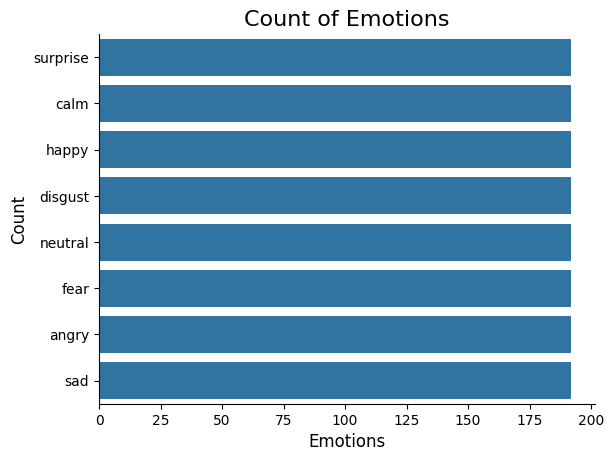

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(balanced_data.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

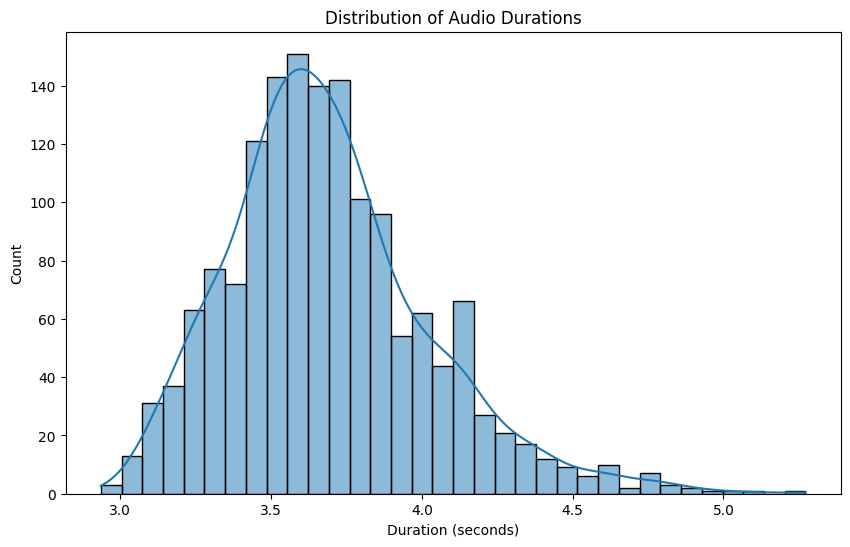

count    1536.000000
mean        3.688668
std         0.333495
min         2.936271
25%         3.470125
50%         3.636979
75%         3.870521
max         5.271937
Name: Duration, dtype: float64


In [ ]:
# Calculate and add duration to the dataframe
durations = []
for path in balanced_data['Path']:
    try:
        y, sr = librosa.load(path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)

        durations.append(duration)
    except Exception as e:
        print(f"Error processing file {path}: {e}")
        durations.append(0)  # Or handle the error differently

balanced_data['Duration'] = durations

# EDA on duration
plt.figure(figsize=(10, 6))
sns.histplot(balanced_data['Duration'], kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()

# Descriptive statistics for duration
print(balanced_data['Duration'].describe())

##Augmentation

In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

##Feature Extraction

In [ ]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)
def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    return audio

In [ ]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(balanced_data.Path,balanced_data.Emotions,range(balanced_data.Path.shape[0]))):

    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

2it [00:03,  1.33s/it]

0 audio has been processed


502it [01:08,  9.03it/s]

500 audio has been processed


1002it [02:13,  7.97it/s]

1000 audio has been processed


1502it [03:17,  9.01it/s]

1500 audio has been processed


1536it [03:21,  7.62it/s]

Done
Time:  201.65188768199994


In [ ]:
len(X), len(Y), balanced_data.shape

(6144, 6144, (1536, 3))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.257324,0.437012,0.522949,0.508301,0.541504,0.501953,0.525879,0.565430,0.480957,0.429199,...,3.820717,3.618230,3.419879,3.229142,3.049141,2.882547,2.731550,2.597754,2.482197,surprise
1,0.246582,0.367188,0.493652,0.487793,0.493164,0.498047,0.496094,0.498535,0.505371,0.496582,...,3.090013,0.202492,0.923643,1.726814,0.995784,2.579044,-0.223299,0.680196,3.437195,surprise
2,0.162598,0.205566,0.226562,0.166016,0.171387,0.189453,0.252930,0.265625,0.285156,0.290039,...,2.272886,2.251770,2.228930,2.204406,2.178223,2.150423,2.121024,2.090080,2.057623,surprise
3,0.232422,0.357910,0.471680,0.479492,0.479980,0.486816,0.497070,0.500000,0.517578,0.510254,...,-2.728080,-4.031243,-0.152940,6.182207,1.981292,-1.232995,-2.025633,-2.602891,-2.719186,surprise
4,0.179199,0.266113,0.334961,0.292969,0.269531,0.236816,0.231934,0.231934,0.272461,0.375488,...,1.174866,1.148569,1.120688,1.091382,1.060812,1.029146,0.996557,0.963214,0.929287,calm


In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(6144, 2377)

In [ ]:
np.sum(Emotions.isna())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,0
1,0
2,0
3,0
4,0
...,...
2372,0
2373,0
2374,0
2375,0


##PREPARATION

In [ ]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)
X.shape

(6144, 8)


(6144, 2376)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4915, 2376), (4915, 8), (1229, 2376), (1229, 8))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4915, 2376), (4915, 8), (1229, 2376), (1229, 8))

In [ ]:
!pip install tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
early_stop=EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

##MODELLING

In [ ]:
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((4915, 2376, 1), (4915, 8), (1229, 2376, 1), (1229, 8))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(x_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(8,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # Changed line
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,10

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3573 - loss: 2.1221

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 59s 431ms/step - accuracy: 0.3584 - loss: 2.1167 - val_accuracy: 0.1123 - val_loss: 4.9969 - learning_rate: 0.0010
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 49s 232ms/step - accuracy: 0.6199 - loss: 1.0779 - val_accuracy: 0.1115 - val_loss: 4.4002 - learning_rate: 0.0010
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7480 - loss: 0.7378

77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.7480 - loss: 0.7377 - val_accuracy: 0.1343 - val_loss: 4.5238 - learning_rate: 0.0010
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 244ms/step - accuracy: 0.8227 - loss: 0.5184 - val_accuracy: 0.1245 - val_loss: 6.0707 - learning_rate: 0.0010
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.8917 - loss: 0.3478

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.8917 - loss: 0.3476 - val_accuracy: 0.1383 - val_loss: 4.9418 - learning_rate: 0.0010
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9292 - loss: 0.2290

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 252ms/step - accuracy: 0.9293 - loss: 0.2291 - val_accuracy: 0.2531 - val_loss: 3.4707 - learning_rate: 0.0010
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9643 - loss: 0.1325

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - accuracy: 0.9644 - loss: 0.1324 - val_accuracy: 0.5045 - val_loss: 1.8762 - learning_rate: 0.0010
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9844 - loss: 0.0727

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.9844 - loss: 0.0726 - val_accuracy: 0.6615 - val_loss: 1.2259 - learning_rate: 0.0010
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9860 - loss: 0.0612

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 0.9861 - loss: 0.0611 - val_accuracy: 0.8031 - val_loss: 0.6796 - learning_rate: 0.0010
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9923 - loss: 0.0432

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - accuracy: 0.9923 - loss: 0.0431 - val_accuracy: 0.8218 - val_loss: 0.5691 - learning_rate: 0.0010
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.9929 - loss: 0.0336

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.9928 - loss: 0.0338 - val_accuracy: 0.8584 - val_loss: 0.4779 - learning_rate: 0.0010
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9926 - loss: 0.0449 - val_accuracy: 0.8413 - val_loss: 0.6445 - learning_rate: 0.0010
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9908 - loss: 0.0409

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.9908 - loss: 0.0409 - val_accuracy: 0.9024 - val_loss: 0.3508 - learning_rate: 0.0010
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9920 - loss: 0.0379 - val_accuracy: 0.8845 - val_loss: 0.3787 - learning_rate: 0.0010
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9962 - loss: 0.0249 - val_accuracy: 0.8918 - val_loss: 0.3626 - learning_rate: 0.0010
Epoch 16/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9996 - loss: 0.0116

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.9996 - loss: 0.0116 - val_accuracy: 0.9064 - val_loss: 0.2994 - learning_rate: 0.0010
Epoch 17/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.9996 - loss: 0.0094

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 253ms/step - accuracy: 0.9996 - loss: 0.0094 - val_accuracy: 0.9162 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 18/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.9990 - loss: 0.0110 - val_accuracy: 0.9105 - val_loss: 0.2802 - learning_rate: 0.0010
Epoch 19/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9996 - loss: 0.0083 - val_accuracy: 0.9113 - val_loss: 0.2949 - learning_rate: 0.0010
Epoch 20/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 1.0000 - loss: 0.0058

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 252ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9203 - val_loss: 0.2426 - learning_rate: 0.0010
Epoch 21/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9194 - val_loss: 0.2341 - learning_rate: 0.0010
Epoch 22/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 1.0000 - loss: 0.0025

77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 254ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9300 - val_loss: 0.2210 - learning_rate: 0.0010
Epoch 23/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9987 - loss: 0.0108 - val_accuracy: 0.8731 - val_loss: 0.4294 - learning_rate: 0.0010
Epoch 24/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - accuracy: 0.9861 - loss: 0.0475 - val_accuracy: 0.6762 - val_loss: 1.3488 - learning_rate: 0.0010
Epoch 25/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.9465 - loss: 0.1613 - val_accuracy: 0.6737 - val_loss: 1.2879 - learning_rate: 0.0010
Epoch 26/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 249ms/step - accuracy: 0.9481 - loss: 0.1440 - val_accuracy: 0.8218 - val_loss: 0.6384 - learning_rate: 0.0010
Epoch 27/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 249ms/step - accuracy: 0.9726 - loss: 0.0783 - val_accuracy: 0.8812 - val_loss: 0.4338 - learning_rate: 0.0010


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9408 - loss: 0.2015
Accuracy of our model on test data :  93.00243854522705 %


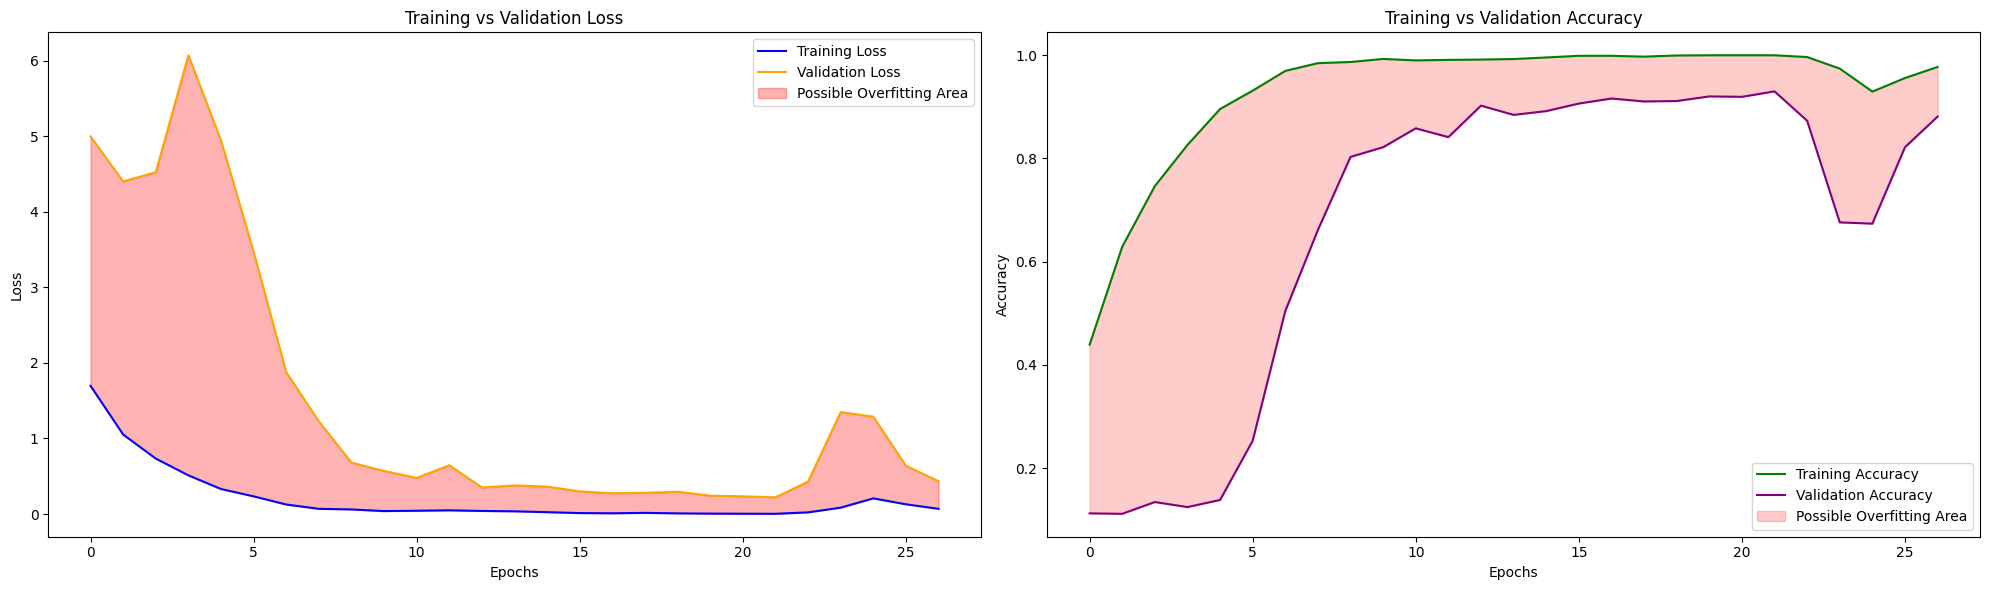

In [ ]:
print("Accuracy of our model on test data : ", model.evaluate(x_testcnn, y_test)[1] * 100, "%")

# Get actual number of epochs the training ran for
epochs = range(len(history.history['loss']))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Loss Plot
ax[0].plot(epochs, train_loss, label='Training Loss', color='blue')
ax[0].plot(epochs, val_loss, label='Validation Loss', color='orange')
ax[0].set_title('Training vs Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Tambahkan area kemungkinan overfitting
ax[0].fill_between(epochs, val_loss, train_loss,
                   where=(np.array(val_loss) > np.array(train_loss)),
                   color='red', alpha=0.3, label='Possible Overfitting Area')
ax[0].legend()

# Accuracy Plot
ax[1].plot(epochs, train_acc, label='Training Accuracy', color='green')
ax[1].plot(epochs, val_acc, label='Validation Accuracy', color='purple')
ax[1].set_title('Training vs Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Tambahkan area kemungkinan overfitting
ax[1].fill_between(epochs, train_acc, val_acc,
                   where=(np.array(train_acc) > np.array(val_acc)),
                   color='red', alpha=0.2, label='Possible Overfitting Area')
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


,Predicted Labels,Actual Labels
0,angry,angry
1,surprise,surprise
2,calm,calm
3,neutral,happy
4,surprise,surprise
5,fear,fear
6,fear,fear
7,angry,angry
8,calm,calm
9,surprise,surprise


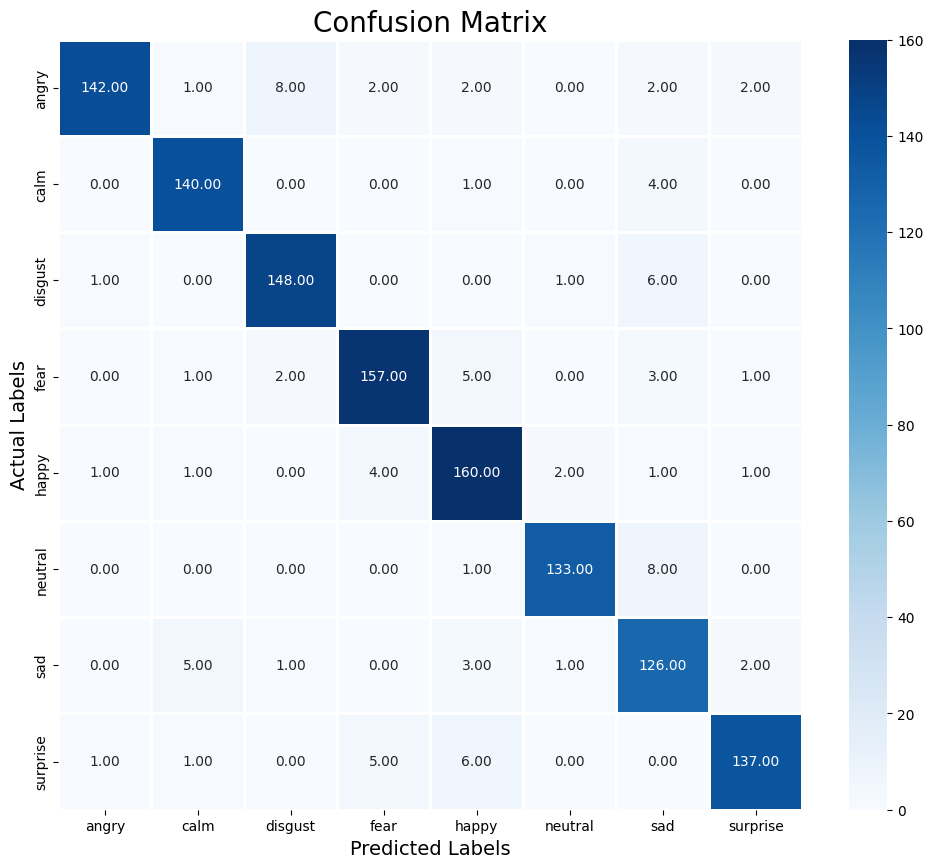

              precision    recall  f1-score   support

       angry       0.98      0.89      0.93       159
        calm       0.94      0.97      0.95       145
     disgust       0.93      0.95      0.94       156
        fear       0.93      0.93      0.93       169
       happy       0.90      0.94      0.92       170
     neutral       0.97      0.94      0.95       142
         sad       0.84      0.91      0.88       138
    surprise       0.96      0.91      0.94       150

    accuracy                           0.93      1229
   macro avg       0.93      0.93      0.93      1229
weighted avg       0.93      0.93      0.93      1229



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [ ]:
model.save('model_full.h5')

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("cnn_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cnn_model.weights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# prompt: cara cek input shape model

model.input_shape


(None, 2376, 1)